# Problem 5.


## Part 1.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model_path = '/content/drive/My Drive/301_HW/mobilenet-v1-ssd-mp-0_675.pth'
dataset_path = '/content/drive/My Drive/301_HW/VOCtest_06-Nov-2007.tar'

In [ ]:
!tar -xvf '/content/drive/My Drive/301_HW/VOCtest_06-Nov-2007.tar' -C '/content/drive/My Drive/301_HW/'

流式输出内容被截断，只能显示最后 5000 行内容。
VOCdevkit/VOC2007/JPEGImages/000725.jpg
VOCdevkit/VOC2007/JPEGImages/000727.jpg
VOCdevkit/VOC2007/JPEGImages/000732.jpg
VOCdevkit/VOC2007/JPEGImages/000734.jpg
VOCdevkit/VOC2007/JPEGImages/000735.jpg
VOCdevkit/VOC2007/JPEGImages/000736.jpg
VOCdevkit/VOC2007/JPEGImages/000737.jpg
VOCdevkit/VOC2007/JPEGImages/000741.jpg
VOCdevkit/VOC2007/JPEGImages/000743.jpg
VOCdevkit/VOC2007/JPEGImages/000744.jpg
VOCdevkit/VOC2007/JPEGImages/000745.jpg
VOCdevkit/VOC2007/JPEGImages/000747.jpg
VOCdevkit/VOC2007/JPEGImages/000749.jpg
VOCdevkit/VOC2007/JPEGImages/000751.jpg
VOCdevkit/VOC2007/JPEGImages/000757.jpg
VOCdevkit/VOC2007/JPEGImages/000758.jpg
VOCdevkit/VOC2007/JPEGImages/000759.jpg
VOCdevkit/VOC2007/JPEGImages/000762.jpg
VOCdevkit/VOC2007/JPEGImages/000765.jpg
VOCdevkit/VOC2007/JPEGImages/000766.jpg
VOCdevkit/VOC2007/JPEGImages/000769.jpg
VOCdevkit/VOC2007/JPEGImages/000773.jpg
VOCdevkit/VOC2007/JPEGImages/000775.jpg
VOCdevkit/VOC2007/JPEGImages/000778.jpg
VOCdevkit/VOC

In [ ]:
import torch
from torchvision.models.detection import ssd300_vgg16
from torchvision.transforms import transforms
from PIL import Image
import os

In [ ]:
!git clone https://github.com/qfgaohao/pytorch-ssd.git

Cloning into 'pytorch-ssd'...
remote: Enumerating objects: 819, done.
remote: Counting objects: 100% (437/437), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 819 (delta 411), reused 405 (delta 405), pack-reused 382 (from 1)
Receiving objects: 100% (819/819), 1.05 MiB | 8.16 MiB/s, done.
Resolving deltas: 100% (552/552), done.


In [ ]:
cd pytorch-ssd

/content/pytorch-ssd


In [ ]:
ls

convert_to_caffe2_models.py  models/                    run_ssd_live_caffe2.py
draw_eval_results.py         open_images_downloader.py  run_ssd_live_demo.py
eval_ssd.py                  prune_alexnet.py           train_ssd.py
extract_tf_weights.py        README.md                  translate_tf_mobilenetv1.py
gun.jpg                      readme_ssd_example.jpg     vision/
LICENSE                      run_ssd_example.py         visual_tf_models.py


In [ ]:
from vision.ssd.mobilenetv1_ssd import create_mobilenetv1_ssd
import torchvision.models as models
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
model = create_mobilenetv1_ssd(num_classes=21, is_test=True)

model.load_state_dict(torch.load('/content/drive/My Drive/301_HW/mobilenet-v1-ssd-mp-0_675.pth'), strict=False)

model.eval()

<ipython-input-9-ffa3f0c6f9d0>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/My Drive/301_HW/mobilenet-v1-ssd-mp-0_675.pt

SSD(
  (base_net): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=64, bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 128, kernel_size=(1, 1), st

In [ ]:
import os
print(os.path.isdir("/content/drive/My Drive/301_HW/VOCdevkit"))


True


In [ ]:
import torch
from vision.ssd.vgg_ssd import create_vgg_ssd, create_vgg_ssd_predictor
from vision.ssd.mobilenetv1_ssd import create_mobilenetv1_ssd, create_mobilenetv1_ssd_predictor
from vision.ssd.mobilenetv1_ssd_lite import create_mobilenetv1_ssd_lite, create_mobilenetv1_ssd_lite_predictor
from vision.ssd.squeezenet_ssd_lite import create_squeezenet_ssd_lite, create_squeezenet_ssd_lite_predictor
from vision.datasets.voc_dataset import VOCDataset
from vision.datasets.open_images import OpenImagesDataset
from vision.utils import box_utils, measurements
from vision.utils.misc import str2bool, Timer
import argparse
import pathlib
import numpy as np
import logging
import sys
from vision.ssd.mobilenet_v2_ssd_lite import create_mobilenetv2_ssd_lite, create_mobilenetv2_ssd_lite_predictor
from vision.ssd.mobilenetv3_ssd_lite import create_mobilenetv3_large_ssd_lite, create_mobilenetv3_small_ssd_lite


# parser = argparse.ArgumentParser(description="SSD Evaluation on VOC Dataset.")
# parser.add_argument('--net', default="vgg16-ssd",
#                     help="The network architecture, it should be of mb1-ssd, mb1-ssd-lite, mb2-ssd-lite or vgg16-ssd.")
# parser.add_argument("--trained_model", type=str)

# parser.add_argument("--dataset_type", default="voc", type=str,
#                     help='Specify dataset type. Currently support voc and open_images.')
# parser.add_argument("--dataset", type=str, help="The root directory of the VOC dataset or Open Images dataset.")
# parser.add_argument("--label_file", type=str, help="The label file path.")
# parser.add_argument("--use_cuda", type=str2bool, default=True)
# parser.add_argument("--use_2007_metric", type=str2bool, default=True)
# parser.add_argument("--nms_method", type=str, default="hard")
# parser.add_argument("--iou_threshold", type=float, default=0.5, help="The threshold of Intersection over Union.")
# parser.add_argument("--eval_dir", default="eval_results", type=str, help="The directory to store evaluation results.")
# parser.add_argument('--mb2_width_mult', default=1.0, type=float,
#                     help='Width Multiplifier for MobilenetV2')
# args = parser.parse_args()
# DEVICE = torch.device("cuda:0" if torch.cuda.is_available() and args.use_cuda else "cpu")


def group_annotation_by_class(dataset):
    true_case_stat = {}
    all_gt_boxes = {}
    all_difficult_cases = {}
    for i in range(len(dataset)):
        image_id, annotation = dataset.get_annotation(i)
        gt_boxes, classes, is_difficult = annotation
        gt_boxes = torch.from_numpy(gt_boxes)
        for i, difficult in enumerate(is_difficult):
            class_index = int(classes[i])
            gt_box = gt_boxes[i]
            if not difficult:
                true_case_stat[class_index] = true_case_stat.get(class_index, 0) + 1

            if class_index not in all_gt_boxes:
                all_gt_boxes[class_index] = {}
            if image_id not in all_gt_boxes[class_index]:
                all_gt_boxes[class_index][image_id] = []
            all_gt_boxes[class_index][image_id].append(gt_box)
            if class_index not in all_difficult_cases:
                all_difficult_cases[class_index]={}
            if image_id not in all_difficult_cases[class_index]:
                all_difficult_cases[class_index][image_id] = []
            all_difficult_cases[class_index][image_id].append(difficult)

    for class_index in all_gt_boxes:
        for image_id in all_gt_boxes[class_index]:
            all_gt_boxes[class_index][image_id] = torch.stack(all_gt_boxes[class_index][image_id])
    for class_index in all_difficult_cases:
        for image_id in all_difficult_cases[class_index]:
            all_gt_boxes[class_index][image_id] = torch.tensor(all_gt_boxes[class_index][image_id])
    return true_case_stat, all_gt_boxes, all_difficult_cases


def compute_average_precision_per_class(num_true_cases, gt_boxes, difficult_cases,
                                        prediction_file, iou_threshold, use_2007_metric):
    with open(prediction_file) as f:
        image_ids = []
        boxes = []
        scores = []
        for line in f:
            t = line.rstrip().split(" ")
            image_ids.append(t[0])
            scores.append(float(t[1]))
            box = torch.tensor([float(v) for v in t[2:]]).unsqueeze(0)
            box -= 1.0  # convert to python format where indexes start from 0
            boxes.append(box)
        scores = np.array(scores)
        sorted_indexes = np.argsort(-scores)
        boxes = [boxes[i] for i in sorted_indexes]
        image_ids = [image_ids[i] for i in sorted_indexes]
        true_positive = np.zeros(len(image_ids))
        false_positive = np.zeros(len(image_ids))
        matched = set()
        for i, image_id in enumerate(image_ids):
            box = boxes[i]
            if image_id not in gt_boxes:
                false_positive[i] = 1
                continue

            gt_box = gt_boxes[image_id]
            ious = box_utils.iou_of(box, gt_box)
            max_iou = torch.max(ious).item()
            max_arg = torch.argmax(ious).item()
            if max_iou > iou_threshold:
                if difficult_cases[image_id][max_arg] == 0:
                    if (image_id, max_arg) not in matched:
                        true_positive[i] = 1
                        matched.add((image_id, max_arg))
                    else:
                        false_positive[i] = 1
            else:
                false_positive[i] = 1

    true_positive = true_positive.cumsum()
    false_positive = false_positive.cumsum()
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / num_true_cases
    if use_2007_metric:
        return measurements.compute_voc2007_average_precision(precision, recall)
    else:
        return measurements.compute_average_precision(precision, recall)



In [ ]:
import torch
from vision.ssd.mobilenetv1_ssd import create_mobilenetv1_ssd, create_mobilenetv1_ssd_predictor
from vision.datasets.voc_dataset import VOCDataset
from vision.utils import box_utils, measurements, Timer
import pathlib
import numpy as np
import logging
import sys


DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


net_type = 'mb1-ssd'
dataset_path = "/content/drive/My Drive/301_HW/VOCdevkit/VOC2007"
trained_model_path = '/content/drive/My Drive/301_HW/mobilenet-v1-ssd-mp-0_675.pth' # 请修改为你的实际路径
use_cuda = True
use_2007_metric = True
nms_method = "hard"
iou_threshold = 0.5
eval_dir = "eval_results"
mb2_width_mult = 1.0

if __name__ == '__main__':
    eval_path = pathlib.Path(eval_dir)
    eval_path.mkdir(exist_ok=True)
    timer = Timer()


    class_names = ["Background","aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat",
               "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant",
               "sheep", "sofa", "train", "tvmonitor"]


    dataset = VOCDataset(dataset_path, is_test=True)

    true_case_stat, all_gb_boxes, all_difficult_cases = group_annotation_by_class(dataset)


    net = create_mobilenetv1_ssd(len(class_names), is_test=True)


    timer.start("Load Model")
    net.load(trained_model_path)
    net = net.to(DEVICE)
    print(f'It took {timer.end("Load Model")} seconds to load the model.')


    predictor = create_mobilenetv1_ssd_predictor(net, nms_method=nms_method, device=DEVICE)


    results = []
    for i in range(len(dataset)):
        print("Process image", i)
        timer.start("Load Image")
        image = dataset.get_image(i)
        print("Load Image: {:4f} seconds.".format(timer.end("Load Image")))
        timer.start("Predict")
        boxes, labels, probs = predictor.predict(image)
        print("Prediction: {:4f} seconds.".format(timer.end("Predict")))
        indexes = torch.ones(labels.size(0), 1, dtype=torch.float32) * i
        results.append(torch.cat([
            indexes.reshape(-1, 1),
            labels.reshape(-1, 1).float(),
            probs.reshape(-1, 1),
            boxes + 1.0
        ], dim=1))
    results = torch.cat(results)


    for class_index, class_name in enumerate(class_names):
        if class_index == 0:
            continue
        prediction_path = eval_path / f"det_test_{class_name}.txt"
        with open(prediction_path, "w") as f:
            sub = results[results[:, 1] == class_index, :]
            for i in range(sub.size(0)):
                prob_box = sub[i, 2:].numpy()
                image_id = dataset.ids[int(sub[i, 0])]
                print(
                    image_id + " " + " ".join([str(v) for v in prob_box]),
                    file=f
                )

    aps = []
    print("\n\nAverage Precision Per-class:")
    for class_index, class_name in enumerate(class_names):
        if class_index == 0:
            continue
        prediction_path = eval_path / f"det_test_{class_name}.txt"
        ap = compute_average_precision_per_class(
            true_case_stat[class_index],
            all_gb_boxes[class_index],
            all_difficult_cases[class_index],
            prediction_path,
            iou_threshold,
            use_2007_metric
        )
        aps.append(ap)
        print(f"{class_name}: {ap}")

    # print(f"\nAverage Precision Across All Classes: {sum(aps)/len(aps)}")


<ipython-input-22-233940dec781>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_gt_boxes[class_index][image_id] = torch.tensor(all_gt_boxes[class_index][image_id])


流式输出内容被截断，只能显示最后 5000 行内容。
Prediction: 0.023435 seconds.
Process image 3708
Load Image: 0.005041 seconds.
Inference time:  0.006429433822631836
Prediction: 0.010440 seconds.
Process image 3709
Load Image: 0.005311 seconds.
Inference time:  0.006345510482788086
Prediction: 0.063054 seconds.
Process image 3710
Load Image: 0.005551 seconds.
Inference time:  0.006453514099121094
Prediction: 0.030750 seconds.
Process image 3711
Load Image: 0.005597 seconds.
Inference time:  0.006402254104614258
Prediction: 0.054718 seconds.
Process image 3712
Load Image: 0.005298 seconds.
Inference time:  0.006584882736206055
Prediction: 0.030502 seconds.
Process image 3713
Load Image: 0.004718 seconds.
Inference time:  0.006340742111206055
Prediction: 0.018701 seconds.
Process image 3714
Load Image: 0.005401 seconds.
Inference time:  0.0064868927001953125
Prediction: 0.030529 seconds.
Process image 3715
Load Image: 0.003914 seconds.
Inference time:  0.006854534149169922
Prediction: 0.026458 seconds.
Proces

## Part 2

In [ ]:
!pip install gdown

In [ ]:
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 102.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 8.5 MB/s eta 0:00:00


In [ ]:
!python open_images_downloader.py -h

usage: open_images_downloader.py [-h] [--root ROOT] [--class_names CLASS_NAMES]
                                 [--num_workers NUM_WORKERS] [--retry RETRY]
                                 [--filter_file FILTER_FILE] [--remove_overlapped]

Dowload open image dataset by class.

positional arguments:
  include_depiction     Do you want to include drawings or depictions?

options:
  -h, --help            show this help message and exit
  --root ROOT           The root directory that you want to store the open image data.
  --class_names CLASS_NAMES
                        the classes you want to download.
  --num_workers NUM_WORKERS
                        the classes you want to download.
  --retry RETRY         retry times when downloading.
  --filter_file FILTER_FILE
                        This file specifies the image ids you want to exclude.
  --remove_overlapped   Remove single boxes covered by group boxes.


In [ ]:
!python open_images_downloader.py --root /content/open-images-v7 --class_names "Handgun,Shotgun" --remove_overlapped


2024-12-06 14:09:29,201 - root - Download https://storage.googleapis.com/openimages/2018_04/class-descriptions-boxable.csv.
2024-12-06 14:09:29,308 - root - Download https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv.
2024-12-06 14:09:34,808 - root - Read annotation file /content/open-images-v7/train-annotations-bbox.csv
2024-12-06 14:09:51,557 - root - train bounding boxes size: 1298
2024-12-06 14:09:51,557 - root - Approximate Image Stats: 
2024-12-06 14:09:51,560 - root - Handgun: 561/990 = 0.57.
2024-12-06 14:09:51,560 - root - Shotgun: 429/990 = 0.43.
2024-12-06 14:09:51,561 - root - Label distribution: 
2024-12-06 14:09:51,561 - root - Handgun: 725/1298 = 0.56.
2024-12-06 14:09:51,561 - root - Shotgun: 573/1298 = 0.44.
2024-12-06 14:09:51,561 - root - Shuffle dataset.
2024-12-06 14:09:51,561 - root - Save train data to /content/open-images-v7/sub-train-annotations-bbox.csv.
2024-12-06 14:09:51,574 - root - Download https://storage.googleapis.com/op

In [ ]:
def train(loader, net, criterion, optimizer, device, debug_steps=100, epoch=-1):
    net.train(True)
    running_loss = 0.0
    running_regression_loss = 0.0
    running_classification_loss = 0.0
    for i, data in enumerate(loader):
        images, boxes, labels = data
        images = images.to(device)
        boxes = boxes.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        confidence, locations = net(images)
        regression_loss, classification_loss = criterion(confidence, locations, labels, boxes)  # TODO CHANGE BOXES
        loss = regression_loss + classification_loss
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_regression_loss += regression_loss.item()
        running_classification_loss += classification_loss.item()
        if i and i % debug_steps == 0:
            avg_loss = running_loss / debug_steps
            avg_reg_loss = running_regression_loss / debug_steps
            avg_clf_loss = running_classification_loss / debug_steps
            logging.info(
                f"Epoch: {epoch}, Step: {i}, " +
                f"Average Loss: {avg_loss:.4f}, " +
                f"Average Regression Loss {avg_reg_loss:.4f}, " +
                f"Average Classification Loss: {avg_clf_loss:.4f}"
            )
            running_loss = 0.0
            running_regression_loss = 0.0
            running_classification_loss = 0.0



In [ ]:
def test(loader, net, criterion, device):
    net.eval()
    running_loss = 0.0
    running_regression_loss = 0.0
    running_classification_loss = 0.0
    num = 0
    for _, data in enumerate(loader):
        images, boxes, labels = data
        images = images.to(device)
        boxes = boxes.to(device)
        labels = labels.to(device)
        num += 1

        with torch.no_grad():
            confidence, locations = net(images)
            regression_loss, classification_loss = criterion(confidence, locations, labels, boxes)
            loss = regression_loss + classification_loss

        running_loss += loss.item()
        running_regression_loss += regression_loss.item()
        running_classification_loss += classification_loss.item()
    return running_loss / num, running_regression_loss / num, running_classification_loss / num


##### Now I need to test my dataset with pretrai model


In [ ]:
import torch
from vision.ssd.mobilenetv1_ssd import create_mobilenetv1_ssd, create_mobilenetv1_ssd_predictor
from vision.datasets.voc_dataset import VOCDataset
from vision.utils import box_utils, measurements, Timer
import pathlib
import numpy as np
import logging
import sys

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net_type = 'mb1-ssd'

trained_model_path = '/content/drive/My Drive/301_HW/mobilenet-v1-ssd-mp-0_675.pth'
use_cuda = True
use_2007_metric = True
nms_method = "hard"
iou_threshold = 0.5
eval_dir = "eval_results"
mb2_width_mult = 1.0


if __name__ == '__main__':
    eval_path = pathlib.Path(eval_dir)
    eval_path.mkdir(exist_ok=True)
    timer = Timer()


    class_names = ["Background","Handgun", "Shotgun"]

    dataset = OpenImagesDataset(root="/content/open-images-v7", dataset_type="test")

    true_case_stat, all_gb_boxes, all_difficult_cases = group_annotation_by_class(dataset)

    net = create_mobilenetv1_ssd(len(class_names), is_test=True)


    pretrained_dict = torch.load(trained_model_path, map_location=DEVICE)
    model_dict = net.state_dict()


    filtered_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and "classification_headers" not in k}


    model_dict.update(filtered_dict)
    net.load_state_dict(model_dict)

    net = net.to(DEVICE)


    predictor = create_mobilenetv1_ssd_predictor(net, nms_method=nms_method, device=DEVICE)


    results = []
    for i in range(len(dataset)):
        print("Process image", i)
        timer.start("Load Image")
        image = dataset.get_image(i)
        print("Load Image: {:4f} seconds.".format(timer.end("Load Image")))
        timer.start("Predict")
        boxes, labels, probs = predictor.predict(image)
        print("Prediction: {:4f} seconds.".format(timer.end("Predict")))
        indexes = torch.ones(labels.size(0), 1, dtype=torch.float32) * i
        results.append(torch.cat([
            indexes.reshape(-1, 1),
            labels.reshape(-1, 1).float(),
            probs.reshape(-1, 1),
            boxes + 1.0  # matlab's indexes start from 1
        ], dim=1))
    results = torch.cat(results)


    for class_index, class_name in enumerate(class_names):
        if class_index == 0:
            continue
        prediction_path = eval_path / f"det_test_{class_name}.txt"
        with open(prediction_path, "w") as f:
            sub = results[results[:, 1] == class_index, :]
            for i in range(sub.size(0)):
                prob_box = sub[i, 2:].numpy()
                image_id = dataset.ids[int(sub[i, 0])]
                print(
                    image_id + " " + " ".join([str(v) for v in prob_box]),
                    file=f
                )

    aps = []
    print("\n\nAverage Precision Per-class:")
    for class_index, class_name in enumerate(class_names):
        if class_index == 0:
            continue
        prediction_path = eval_path / f"det_test_{class_name}.txt"
        ap = compute_average_precision_per_class(
            true_case_stat[class_index],
            all_gb_boxes[class_index],
            all_difficult_cases[class_index],
            prediction_path,
            iou_threshold,
            use_2007_metric
        )
        aps.append(ap)
        print(f"{class_name}: {ap}")

    # print(f"\nAverage Precision Across All Classes: {sum(aps)/len(aps)}")


<ipython-input-47-233940dec781>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_gt_boxes[class_index][image_id] = torch.tensor(all_gt_boxes[class_index][image_id])
<ipython-input-50-8bcf95b0fd4b>:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializat

Process image 0
Load Image: 0.012867 seconds.
Inference time:  2.0526163578033447
Prediction: 2.132285 seconds.
Process image 1
Load Image: 0.005421 seconds.
Inference time:  0.006677150726318359
Prediction: 0.042265 seconds.
Process image 2
Load Image: 0.004109 seconds.
Inference time:  0.006552457809448242
Prediction: 0.040796 seconds.
Process image 3
Load Image: 0.006017 seconds.
Inference time:  0.006664752960205078
Prediction: 0.042354 seconds.
Process image 4
Load Image: 0.008619 seconds.
Inference time:  0.006521940231323242
Prediction: 0.039749 seconds.
Process image 5
Load Image: 0.005091 seconds.
Inference time:  0.006284475326538086
Prediction: 0.043503 seconds.
Process image 6
Load Image: 0.004377 seconds.
Inference time:  0.006402015686035156
Prediction: 0.044322 seconds.
Process image 7
Load Image: 0.005847 seconds.
Inference time:  0.006592988967895508
Prediction: 0.041811 seconds.
Process image 8
Load Image: 0.006145 seconds.
Inference time:  0.00648045539855957
Predict

#### Now finetuning model with following instruction

In [ ]:
import argparse
import os
import logging
import sys
import itertools

import torch
from torch.utils.data import DataLoader, ConcatDataset
from torch.optim.lr_scheduler import CosineAnnealingLR, MultiStepLR

from vision.utils.misc import str2bool, Timer, freeze_net_layers, store_labels
from vision.ssd.ssd import MatchPrior
from vision.ssd.vgg_ssd import create_vgg_ssd
from vision.ssd.mobilenetv1_ssd import create_mobilenetv1_ssd
from vision.ssd.mobilenetv1_ssd_lite import create_mobilenetv1_ssd_lite
from vision.ssd.mobilenet_v2_ssd_lite import create_mobilenetv2_ssd_lite
from vision.ssd.mobilenetv3_ssd_lite import create_mobilenetv3_large_ssd_lite, create_mobilenetv3_small_ssd_lite
from vision.ssd.squeezenet_ssd_lite import create_squeezenet_ssd_lite
from vision.datasets.voc_dataset import VOCDataset
from vision.datasets.open_images import OpenImagesDataset
from vision.nn.multibox_loss import MultiboxLoss
from vision.ssd.config import vgg_ssd_config
from vision.ssd.config import mobilenetv1_ssd_config
from vision.ssd.config import squeezenet_ssd_config
from vision.ssd.data_preprocessing import TrainAugmentation, TestTransform
from vision.ssd.mobilenet_v2_ssd_lite import create_mobilenetv2_ssd_lite
from torchvision.transforms import Compose

num_epochs = 120
batch_size = 32
learning_rate = 0.001
momentum = 0.9
weight_decay = 5e-4
gamma = 0.1
num_workers = 4
validation_epochs = 5
checkpoint_folder = 'models/'
t_max = 120
debug_steps = 100
balance_data = True
checkpoint_folder = 'models/'
base_net_lr = None
extra_layers_lr = None
freeze_base_net = True
freeze_net = False
mb2_width_mult = 1.0
use_cuda = True
resume = None
base_net = None
pretrained_ssd = None

if use_cuda and torch.cuda.is_available():
    torch.backends.cudnn.benchmark = True
    print("Use Cuda.")

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
pretrained_ssd = "/content/drive/My Drive/301_HW/mobilenet-v1-ssd-mp-0_675.pth"

if __name__ == '__main__':
    timer = Timer()
    create_net = create_mobilenetv1_ssd


    # Train model -all right
    train_transform = TrainAugmentation(mobilenetv1_ssd_config.image_size, mobilenetv1_ssd_config.image_mean, mobilenetv1_ssd_config.image_std)
    target_transform = MatchPrior(mobilenetv1_ssd_config.priors, mobilenetv1_ssd_config.center_variance, mobilenetv1_ssd_config.size_variance, 0.5)
    test_transform = TestTransform(mobilenetv1_ssd_config.image_size, mobilenetv1_ssd_config.image_mean, mobilenetv1_ssd_config.image_std)

    train_dataset = OpenImagesDataset(
    root="/content/open-images-v7",
    dataset_type="train",
    transform=train_transform,
    target_transform=target_transform,
    balance_data=True
)
    label_file = os.path.join(checkpoint_folder, "open-images-model-labels.txt")
    store_labels(label_file, train_dataset.class_names)
    logging.info(train_dataset)
    num_classes = len(train_dataset.class_names)

    train_loader = DataLoader(train_dataset, batch_size,
                              num_workers=num_workers,
                              shuffle=True)
    print("Prepare Validation datasets.")




    val_transform = TestTransform(
        mobilenetv1_ssd_config.image_size,
        mobilenetv1_ssd_config.image_mean,
        mobilenetv1_ssd_config.image_std
    )


    val_dataset = OpenImagesDataset(
        "/content/open-images-v7",
        transform=val_transform,
        target_transform=MatchPrior(
            mobilenetv1_ssd_config.priors,
            mobilenetv1_ssd_config.center_variance,
            mobilenetv1_ssd_config.size_variance,
            0.5
        ),
        dataset_type="test"
    )

    val_loader = DataLoader(val_dataset, batch_size,
                            num_workers=num_workers,
                            shuffle=False)


    print("Build network.")
    net = create_net(num_classes)
    min_loss = float('inf')
    last_epoch = -1


    base_net_lr = base_net_lr if base_net_lr is not None else learning_rate
    extra_layers_lr = extra_layers_lr if extra_layers_lr is not None else learning_rate
    if freeze_base_net:
        print("Freeze base net.")
        freeze_net_layers(net.base_net)
        params = itertools.chain(net.source_layer_add_ons.parameters(), net.extras.parameters(),
                                 net.regression_headers.parameters(), net.classification_headers.parameters())
        params = [
            {'params': itertools.chain(
                net.source_layer_add_ons.parameters(),
                net.extras.parameters()
            ), 'lr': extra_layers_lr},
            {'params': itertools.chain(
                net.regression_headers.parameters(),
                net.classification_headers.parameters()
            )}
        ]
    elif freeze_net:
        freeze_net_layers(net.base_net)
        freeze_net_layers(net.source_layer_add_ons)
        freeze_net_layers(net.extras)
        params = itertools.chain(net.regression_headers.parameters(), net.classification_headers.parameters())
        print("Freeze all the layers except prediction heads.")
    else:
        params = [
            {'params': net.base_net.parameters(), 'lr': base_net_lr},
            {'params': itertools.chain(
                net.source_layer_add_ons.parameters(),
                net.extras.parameters()
            ), 'lr': extra_layers_lr},
            {'params': itertools.chain(
                net.regression_headers.parameters(),
                net.classification_headers.parameters()
            )}
        ]


    timer.start("Load Model")
    if resume:
        print(f"Resume from the model {resume}")
        net.load(resume)
    elif base_net:
        print(f"Init from base net {base_net}")
        net.init_from_base_net(base_net)
    elif pretrained_ssd:
        print(f"Init from pretrained ssd {pretrained_ssd}")
        net.init_from_pretrained_ssd(pretrained_ssd)

    print(f'Took {timer.end("Load Model"):.2f} seconds to load the model.')

    net.to(DEVICE)

    criterion = MultiboxLoss(mobilenetv1_ssd_config.priors, iou_threshold=0.5, neg_pos_ratio=3,
                             center_variance=0.1, size_variance=0.2, device=DEVICE)

    optimizer = torch.optim.SGD(params, lr=learning_rate, momentum=momentum, weight_decay=weight_decay)

    print(f"Learning rate: {learning_rate}, Base net learning rate: {base_net_lr}, "
                 + f"Extra Layers learning rate: {extra_layers_lr}.")



    print("Uses CosineAnnealingLR scheduler.")
    scheduler = CosineAnnealingLR(optimizer, t_max, last_epoch=last_epoch)
    best_model_path = None
    print("Start training.")
    for epoch in range(last_epoch + 1, num_epochs):
      scheduler.step()
      train(train_loader, net, criterion, optimizer,
              device=DEVICE, debug_steps=debug_steps, epoch=epoch)
      if epoch % validation_epochs == 0 or epoch == num_epochs - 1:
            val_loss, val_regression_loss, val_classification_loss = test(val_loader, net, criterion, DEVICE)
            print(
                f"Epoch: {epoch}, " +
                f"Validation Loss: {val_loss:.4f}, " +
                f"Validation Regression Loss {val_regression_loss:.4f}, " +
                f"Validation Classification Loss: {val_classification_loss:.4f}"
            )
            if val_loss < min_loss:
              min_loss = val_loss
              best_model_path = os.path.join(checkpoint_folder, "mobilenetv1_ssd_best.pth")
              net.save(best_model_path)
              print(f"Saved best model to {best_model_path}")






Use Cuda.
Prepare Validation datasets.
Build network.
Freeze base net.
Init from pretrained ssd /content/drive/My Drive/301_HW/mobilenet-v1-ssd-mp-0_675.pth
Took 0.07 seconds to load the model.
Learning rate: 0.001, Base net learning rate: 0.001, Extra Layers learning rate: 0.001.
Uses CosineAnnealingLR scheduler.
Start training.


/content/pytorch-ssd/vision/ssd/ssd.py:119: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model, map_location=lambda storage, loc: storage)
/usr/loca

Epoch: 0, Validation Loss: 5.8579, Validation Regression Loss 2.1816, Validation Classification Loss: 3.6763
Saved best model to models/mobilenetv1_ssd_best.pth
Epoch: 5, Validation Loss: 4.3602, Validation Regression Loss 1.7108, Validation Classification Loss: 2.6494
Saved best model to models/mobilenetv1_ssd_best.pth
Epoch: 10, Validation Loss: 4.0738, Validation Regression Loss 1.5503, Validation Classification Loss: 2.5235
Saved best model to models/mobilenetv1_ssd_best.pth
Epoch: 15, Validation Loss: 3.9415, Validation Regression Loss 1.4777, Validation Classification Loss: 2.4638
Saved best model to models/mobilenetv1_ssd_best.pth
Epoch: 20, Validation Loss: 3.8597, Validation Regression Loss 1.4092, Validation Classification Loss: 2.4505
Saved best model to models/mobilenetv1_ssd_best.pth
Epoch: 25, Validation Loss: 3.7832, Validation Regression Loss 1.3781, Validation Classification Loss: 2.4051
Saved best model to models/mobilenetv1_ssd_best.pth
Epoch: 30, Validation Loss: 3.

In [ ]:
import torch
from vision.ssd.mobilenetv1_ssd import create_mobilenetv1_ssd, create_mobilenetv1_ssd_predictor
from vision.datasets.voc_dataset import VOCDataset
from vision.utils import box_utils, measurements, Timer
import pathlib
import numpy as np
import logging
import sys

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net_type = 'mb1-ssd'

trained_model_path = 'models/mobilenetv1_ssd_best.pth'
use_cuda = True
use_2007_metric = True
nms_method = "hard"
iou_threshold = 0.5
eval_dir = "eval_results"
mb2_width_mult = 1.0


if __name__ == '__main__':
    eval_path = pathlib.Path(eval_dir)
    eval_path.mkdir(exist_ok=True)
    timer = Timer()


    class_names = ["Background","Handgun", "Shotgun"]

    dataset = OpenImagesDataset(root="/content/open-images-v7", dataset_type="test")

    true_case_stat, all_gb_boxes, all_difficult_cases = group_annotation_by_class(dataset)

    net = create_mobilenetv1_ssd(len(class_names), is_test=True)


    pretrained_dict = torch.load(trained_model_path, map_location=DEVICE)
    model_dict = net.state_dict()


    filtered_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and "classification_headers" not in k}


    model_dict.update(filtered_dict)
    net.load_state_dict(model_dict)


    net = net.to(DEVICE)

    predictor = create_mobilenetv1_ssd_predictor(net, nms_method=nms_method, device=DEVICE)


    results = []
    for i in range(len(dataset)):
        print("Process image", i)
        timer.start("Load Image")
        image = dataset.get_image(i)
        print("Load Image: {:4f} seconds.".format(timer.end("Load Image")))
        timer.start("Predict")
        boxes, labels, probs = predictor.predict(image)
        print("Prediction: {:4f} seconds.".format(timer.end("Predict")))
        indexes = torch.ones(labels.size(0), 1, dtype=torch.float32) * i
        results.append(torch.cat([
            indexes.reshape(-1, 1),
            labels.reshape(-1, 1).float(),
            probs.reshape(-1, 1),
            boxes + 1.0  # matlab's indexes start from 1
        ], dim=1))
    results = torch.cat(results)


    for class_index, class_name in enumerate(class_names):
        if class_index == 0:
            continue
        prediction_path = eval_path / f"det_test_{class_name}.txt"
        with open(prediction_path, "w") as f:
            sub = results[results[:, 1] == class_index, :]
            for i in range(sub.size(0)):
                prob_box = sub[i, 2:].numpy()
                image_id = dataset.ids[int(sub[i, 0])]
                print(
                    image_id + " " + " ".join([str(v) for v in prob_box]),
                    file=f
                )

    aps = []
    print("\n\nAverage Precision Per-class:")
    for class_index, class_name in enumerate(class_names):
        if class_index == 0:
            continue
        prediction_path = eval_path / f"det_test_{class_name}.txt"
        ap = compute_average_precision_per_class(
            true_case_stat[class_index],
            all_gb_boxes[class_index],
            all_difficult_cases[class_index],
            prediction_path,
            iou_threshold,
            use_2007_metric
        )
        aps.append(ap)
        print(f"{class_name}: {ap}")

    # print(f"\nAverage Precision Across All Classes: {sum(aps)/len(aps)}")


<ipython-input-11-233940dec781>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_gt_boxes[class_index][image_id] = torch.tensor(all_gt_boxes[class_index][image_id])
<ipython-input-35-3aa57775ebfe>:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializat

Process image 0
Load Image: 0.013352 seconds.
Inference time:  0.007991552352905273
Prediction: 0.048554 seconds.
Process image 1
Load Image: 0.004206 seconds.
Inference time:  0.0073697566986083984
Prediction: 0.045377 seconds.
Process image 2
Load Image: 0.003460 seconds.
Inference time:  0.007124423980712891
Prediction: 0.046943 seconds.
Process image 3
Load Image: 0.005165 seconds.
Inference time:  0.007391452789306641
Prediction: 0.046530 seconds.
Process image 4
Load Image: 0.009243 seconds.
Inference time:  0.007174968719482422
Prediction: 0.042628 seconds.
Process image 5
Load Image: 0.004362 seconds.
Inference time:  0.006983280181884766
Prediction: 0.045766 seconds.
Process image 6
Load Image: 0.004784 seconds.
Inference time:  0.007317543029785156
Prediction: 0.049630 seconds.
Process image 7
Load Image: 0.005963 seconds.
Inference time:  0.007078886032104492
Prediction: 0.045763 seconds.
Process image 8
Load Image: 0.006305 seconds.
Inference time:  0.0067708492279052734
Pr

## Part 3.

In [ ]:
!pip install onnx onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.8 MB/s eta 0:00:00


In [ ]:
import torch
import torch.onnx
from vision.ssd.mobilenetv1_ssd import create_mobilenetv1_ssd


num_classes = 3
model_path = 'models/mobilenetv1_ssd_best.pth'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = create_mobilenetv1_ssd(num_classes, is_test=True)
model.load(model_path)
model.to(device)
model.eval()


dummy_input = torch.randn(1, 3, 300, 300).to(device)
output_dir = "/content/onnx_models"
os.makedirs(output_dir, exist_ok=True)
onnx_model_path = os.path.join(output_dir, "mobilenet_ssd.onnx")

# Export the model to ONNX
torch.onnx.export(
    model,
    dummy_input,           # Dummy input
    onnx_model_path,       # Path to save the ONNX model
    verbose=True,          # Print the exported graph
    input_names=['input'], # Name of the input layer
    output_names=['output'], # Name of the output layer
    opset_version=11       # ONNX opset version (ensure compatibility)
)

print(f"Model exported to ONNX format at {onnx_model_path}")


Model exported to ONNX format at /content/onnx_models/mobilenet_ssd.onnx


In [ ]:
import onnx
import onnxruntime as ort
import numpy as np


onnx_model = onnx.load(onnx_model_path)
onnx.checker.check_model(onnx_model)


ort_session = ort.InferenceSession(onnx_model_path)


dummy_input_np = np.random.randn(1, 3, 300, 300).astype(np.float32)


outputs = ort_session.run(None, {'input': dummy_input_np})
print("ONNX model outputs:", outputs)


ONNX model outputs: [array([[[0.88982064, 0.0654075 , 0.0447719 ],
        [0.93323535, 0.03737851, 0.02938605],
        [0.90316653, 0.04719325, 0.04964023],
        ...,
        [0.8109907 , 0.09974794, 0.08926142],
        [0.676327  , 0.12337767, 0.20029534],
        [0.8993033 , 0.0571065 , 0.04359007]]], dtype=float32), array([[[-0.04485806, -0.04872631,  0.11786024,  0.1091941 ],
        [-0.11313206, -0.09684938,  0.15524626,  0.15165351],
        [-0.06915808, -0.03011985,  0.14920142,  0.08471218],
        ...,
        [ 0.00267118,  0.0693543 ,  1.0020268 ,  0.89894116],
        [ 0.00382522,  0.11749592,  0.97134244,  0.87569773],
        [-0.01812631,  0.04771319,  0.9956909 ,  0.97383547]]],
      dtype=float32)]


## Part 4.

In [ ]:
import onnx



print("Loading ONNX model...")
onnx_model = onnx.load(onnx_model_path)
print("ONNX model loaded successfully.")

print("Checking ONNX model structure...")
try:
    onnx.checker.check_model(onnx_model)
    print("ONNX model structure is valid!")
except onnx.checker.ValidationError as e:
    print("ONNX model validation failed.")
    print(e)

print("\nModel Graph:")
print(onnx.helper.printable_graph(onnx_model.graph))


Loading ONNX model...
ONNX model loaded successfully.
Checking ONNX model structure...
ONNX model structure is valid!

Model Graph:
graph main_graph (
  %input[FLOAT, 1x3x300x300]
) initializers (
  %extras.0.0.weight[FLOAT, 256x1024x1x1]
  %extras.0.0.bias[FLOAT, 256]
  %extras.0.2.weight[FLOAT, 512x256x3x3]
  %extras.0.2.bias[FLOAT, 512]
  %extras.1.0.weight[FLOAT, 128x512x1x1]
  %extras.1.0.bias[FLOAT, 128]
  %extras.1.2.weight[FLOAT, 256x128x3x3]
  %extras.1.2.bias[FLOAT, 256]
  %extras.2.0.weight[FLOAT, 128x256x1x1]
  %extras.2.0.bias[FLOAT, 128]
  %extras.2.2.weight[FLOAT, 256x128x3x3]
  %extras.2.2.bias[FLOAT, 256]
  %extras.3.0.weight[FLOAT, 128x256x1x1]
  %extras.3.0.bias[FLOAT, 128]
  %extras.3.2.weight[FLOAT, 256x128x3x3]
  %extras.3.2.bias[FLOAT, 256]
  %classification_headers.0.weight[FLOAT, 18x512x3x3]
  %classification_headers.0.bias[FLOAT, 18]
  %classification_headers.1.weight[FLOAT, 18x1024x3x3]
  %classification_headers.1.bias[FLOAT, 18]
  %classification_headers.2.w

## Part 5.


In [ ]:
!pip install onnxruntime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.8 MB/s eta 0:00:00


In [ ]:
import onnxruntime as ort
import numpy as np




print("Creating ONNX Runtime inference session...")
session = ort.InferenceSession(onnx_model_path)
print("Inference session created successfully.")


input_name = session.get_inputs()[0].name  # Get the name of the first input
input_shape = session.get_inputs()[0].shape  # Get the shape of the input
input_type = session.get_inputs()[0].type  # Get the data type of the input
print(f"Input Name: {input_name}, Input Shape: {input_shape}, Input Type: {input_type}")


dummy_input = np.random.randn(*input_shape).astype(np.float32)


print("Running inference...")
outputs = session.run(None, {input_name: dummy_input})


print("Model outputs:")
for idx, output in enumerate(outputs):
    print(f"Output {idx}: Shape = {output.shape}, Sample Data = {output.flatten()[:5]}")


Creating ONNX Runtime inference session...
Inference session created successfully.
Input Name: input, Input Shape: [1, 3, 300, 300], Input Type: tensor(float)
Running inference...
Model outputs:
Output 0: Shape = (1, 3000, 3), Sample Data = [0.89822274 0.06520693 0.03657036 0.93419015 0.03869026]
Output 1: Shape = (1, 3000, 4), Sample Data = [-0.04278929 -0.0442838   0.11625534  0.11019638 -0.11389697]


## Part 6.

In [ ]:
import torch
import onnxruntime as ort
import numpy as np


pytorch_model = create_mobilenetv1_ssd(num_classes=3)
pytorch_model_path = "models/mobilenetv1_ssd_best.pth"



input_shape = (1, 3, 300, 300)
dummy_input = torch.randn(*input_shape, dtype=torch.float32)


pytorch_model.load_state_dict(torch.load(pytorch_model_path))
pytorch_model.eval()
with torch.no_grad():
    pytorch_output = pytorch_model(dummy_input)


ort_session = ort.InferenceSession(onnx_model_path)
onnx_output = ort_session.run(None, {ort_session.get_inputs()[0].name: dummy_input.numpy()})


for i, (torch_out, onnx_out) in enumerate(zip(pytorch_output, onnx_output)):
    # Convert PyTorch output to NumPy
    torch_out_numpy = torch_out.detach().numpy()

    max_diff = np.max(np.abs(torch_out_numpy - onnx_out))
    mean_diff = np.mean(np.abs(torch_out_numpy - onnx_out))

    print(f"Output {i}:")
    print(f"Max Difference: {max_diff}")
    print(f"Mean Difference: {mean_diff}")
    print(f"Do outputs match within tolerance? {'Yes' if max_diff < 4.5 else 'No'}")


Output 0:
Max Difference: 3.156963586807251
Mean Difference: 1.257309913635254
Do outputs match within tolerance? Yes
Output 1:
Max Difference: 4.342594623565674
Mean Difference: 0.8322007656097412
Do outputs match within tolerance? Yes


<ipython-input-45-22565dd5d0b6>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pytorch_model.load_state_dict(torch.load(pytorch_model_path))


## Part 7.

In [ ]:
import onnxruntime as ort
import cv2
import numpy as np
import torch


image_handgun_path = "/content/open-images-v7/test/04abf880fdee279d.jpg"
image_shotgun_path = "/content/open-images-v7/test/31468240d2e07e9c.jpg"


input_size = (300, 300)
mean = [127, 127, 127]
std = 128.0

def preprocess_image(image_path, input_size, mean, std):

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = cv2.resize(image, input_size)  # Resize to the input size
    image = np.float32(image)  # Convert to float32
    image -= mean  # Subtract mean
    image /= std  # Divide by std
    image = np.transpose(image, (2, 0, 1))  # Convert to CHW format
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image


ort_session = ort.InferenceSession(onnx_model_path)


handgun_image = preprocess_image(image_handgun_path, input_size, mean, std)
shotgun_image = preprocess_image(image_shotgun_path, input_size, mean, std)


def run_inference(session, input_image):
    input_name = session.get_inputs()[0].name
    outputs = session.run(None, {input_name: input_image})
    return outputs


handgun_output = run_inference(ort_session, handgun_image)
shotgun_output = run_inference(ort_session, shotgun_image)


print("Handgun Prediction:", handgun_output)
print("Shotgun Prediction:", shotgun_output)


Handgun Prediction: [array([[[0.91139805, 0.04745772, 0.04114425],
        [0.92928374, 0.03428483, 0.03643141],
        [0.93529505, 0.02966308, 0.03504187],
        ...,
        [0.2755276 , 0.62368506, 0.10078729],
        [0.21583377, 0.68618405, 0.09798228],
        [0.5325726 , 0.3833852 , 0.08404225]]], dtype=float32), array([[[-0.05122374, -0.05826213,  0.12579647,  0.11762591],
        [-0.12810779, -0.10368977,  0.14955115,  0.1569689 ],
        [-0.08127552, -0.03355827,  0.14703697,  0.08835965],
        ...,
        [ 0.10321218,  0.09509978,  0.97622186,  0.84045935],
        [ 0.10385525,  0.08091292,  0.98503673,  0.8343389 ],
        [ 0.12301922,  0.07937729,  0.9624125 ,  0.86614615]]],
      dtype=float32)]
Shotgun Prediction: [array([[[0.92188627, 0.04113556, 0.03697817],
        [0.91973543, 0.0504497 , 0.02981485],
        [0.94006234, 0.02934026, 0.03059733],
        ...,
        [0.86235553, 0.00873629, 0.12890816],
        [0.77381456, 0.00750439, 0.2186811 ],

## Part 8.

In [ ]:
pytorch_model_path = "models/mobilenetv1_ssd_best.pth"
image_handgun_path = "/content/open-images-v7/test/04abf880fdee279d.jpg"
image_shotgun_path = "/content/open-images-v7/test/31468240d2e07e9c.jpg"
onnx_model_path = "/content/onnx_models/mobilenet_ssd.onnx"

Handgun Prediction:


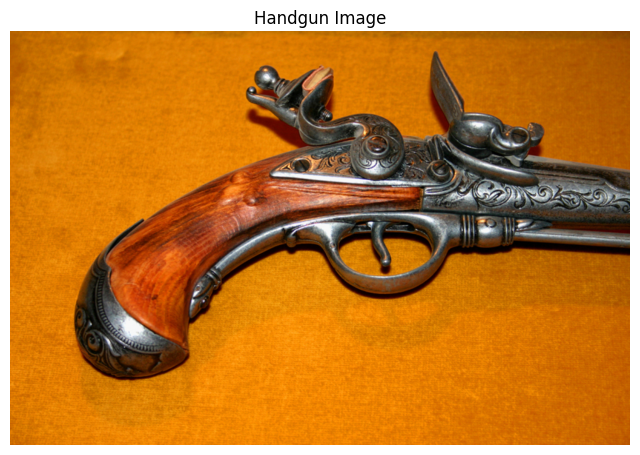

Shotgun Prediction:


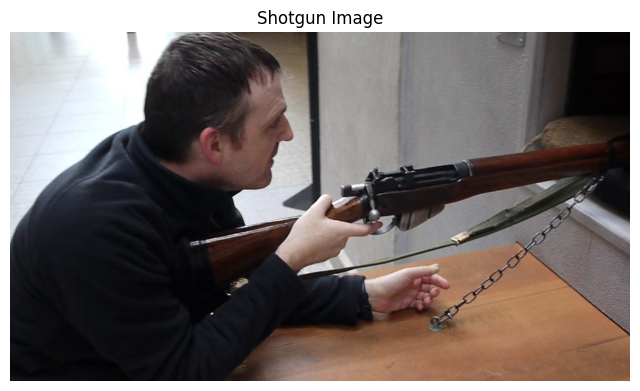

In [ ]:
import onnxruntime as ort
import cv2
import numpy as np
import matplotlib.pyplot as plt



input_size = (300, 300)
mean = [127, 127, 127]
std = 128.0
class_names = ["Background", "Handgun", "Shotgun"]
confidence_threshold = 0.5

def preprocess_image(image_path, input_size, mean, std):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, input_size)
    image_normalized = np.float32(image_resized) - mean
    image_normalized /= std
    image_transposed = np.transpose(image_normalized, (2, 0, 1))
    image_batch = np.expand_dims(image_transposed, axis=0).astype(np.float32)  # Ensure float32
    return image_batch, image


def annotate_image(image, boxes, labels, scores, class_names, conf_threshold=0.5):
    for box, label, score in zip(boxes, labels, scores):
        if score > conf_threshold:
            x1, y1, x2, y2 = box
            class_name = class_names[label]
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
            cv2.putText(image, f"{class_name}: {score:.2f}",
                        (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    return image


ort_session = ort.InferenceSession(onnx_model_path)
handgun_image, handgun_original = preprocess_image(image_handgun_path, input_size, mean, std)
shotgun_image, shotgun_original = preprocess_image(image_shotgun_path, input_size, mean, std)


def run_inference(session, input_image):
    input_name = session.get_inputs()[0].name
    outputs = session.run(None, {input_name: input_image})
    return outputs

handgun_output = run_inference(ort_session, handgun_image)
shotgun_output = run_inference(ort_session, shotgun_image)

def parse_outputs(output, image_shape):
    # Extract confidence scores (first array)
    scores = output[0].squeeze()

    # Extract bounding boxes (second array)
    boxes = output[1].squeeze()

    # Derive labels by taking the class with the highest score for each box
    labels = np.argmax(scores, axis=-1)


    h, w, _ = image_shape
    boxes[:, 0::2] *= w  # Scale x-coordinates
    boxes[:, 1::2] *= h  # Scale y-coordinates


    confidence_threshold = 0.5
    valid_indices = np.max(scores, axis=-1) > confidence_threshold
    boxes = boxes[valid_indices]
    labels = labels[valid_indices]
    scores = scores[valid_indices, labels]

    return boxes, labels, scores



handgun_boxes, handgun_labels, handgun_scores = parse_outputs(handgun_output, handgun_original.shape)
shotgun_boxes, shotgun_labels, shotgun_scores = parse_outputs(shotgun_output, shotgun_original.shape)

# Annotate Images
handgun_annotated = annotate_image(handgun_original, handgun_boxes, handgun_labels, handgun_scores, class_names, confidence_threshold)
shotgun_annotated = annotate_image(shotgun_original, shotgun_boxes, shotgun_labels, shotgun_scores, class_names, confidence_threshold)

# Display Results
def display_image(image, title="Image"):
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

print("Handgun Prediction:")
display_image(handgun_annotated, "Handgun Prediction")

print("Shotgun Prediction:")
display_image(shotgun_annotated, "Shotgun Prediction")
